In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

import visuals as vs

%matplotlib inline


data = pd.read_csv('customers.csv')

data.drop(['Region', 'Channel'], axis = 1, inplace = True)

print 'Dataset has {} samples and {} features'.format(*data.shape)


    

Dataset has 440 samples and 6 features


In [3]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:

indices = [1,4,19]


samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)



Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,22615,5410,7198,3915,1777,5185
2,7780,2495,9464,669,2518,501


In [37]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import fbeta_score
from sklearn.ensemble import GradientBoostingClassifier

y = data['Delicatessen']

x = data.drop(['Delicatessen'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=42)


clf = GradientBoostingClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = fbeta_score(y_test, y_pred, average='micro', beta=0.5)


print score



NameError: name 'scorer' is not defined

/Applications/anaconda/envs/mlpy2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


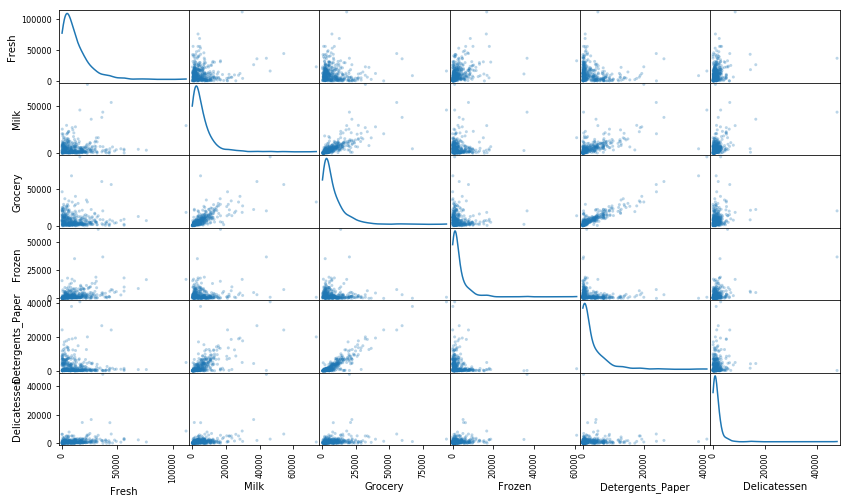

In [39]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

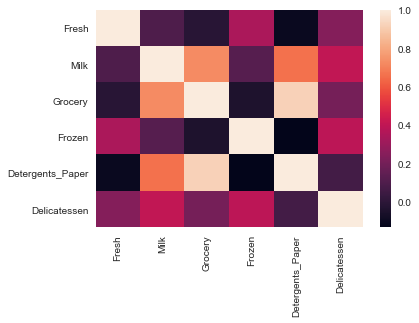

In [44]:
import seaborn as sns; sns.set()

sns.heatmap(data.corr())

/Applications/anaconda/envs/mlpy2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


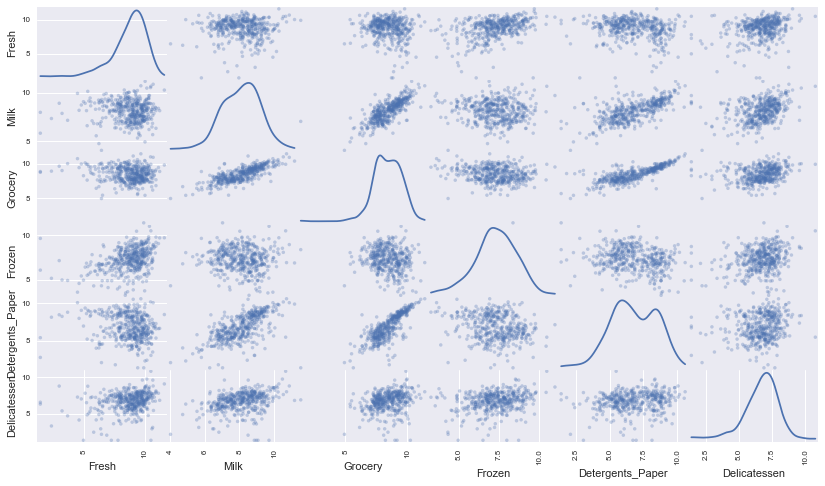

In [46]:


# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x : np.log(x+1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x+1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [47]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
1,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718
2,8.959440,7.822445,9.155356,6.507278,7.831617,6.218600


In [52]:



print np.mean(data['Fresh'], axis = 0)

12000.2977273


In [82]:

for feature in log_data.keys():
    
    
    Q1 = np.percentile(data[feature], 25, axis = 0)
    
    Q3 = np.percentile(data[feature], 75, axis = 0)
    
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
   
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []


good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


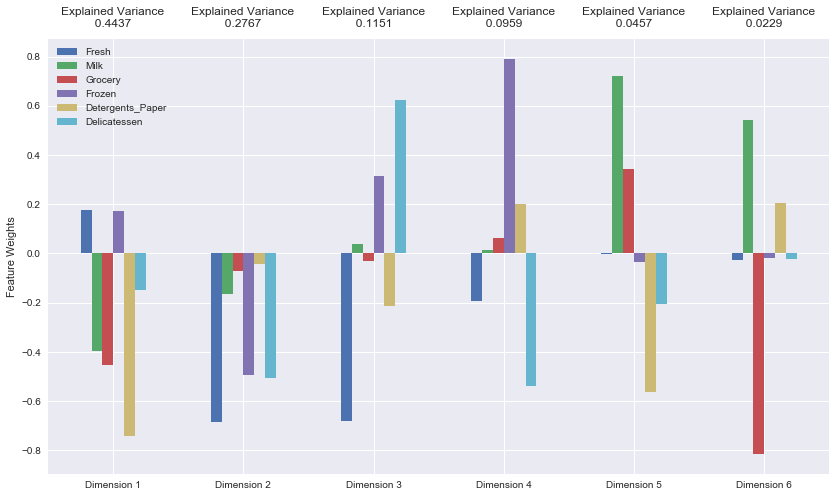

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)

pca_fitted = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


In [86]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-9393.0733,-9045.6561,-3743.7449,455.4838,8093.4798,-2089.8469
1,-2836.0521,-21503.3806,-11289.4300,-3202.9677,4174.6416,-3399.3733
2,-5743.5535,-7103.9288,-5483.6705,-114.5138,3510.3683,-6091.9989


In [96]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)

pca_fit = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca_fit.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca_fit.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])



In [97]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-9393.0733,-9045.6561
1,-2836.0521,-21503.3806
2,-5743.5535,-7103.9288


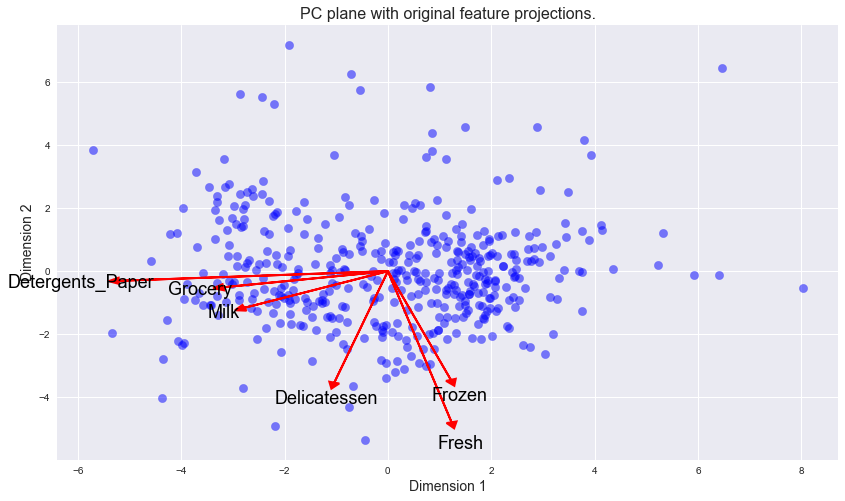

In [98]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

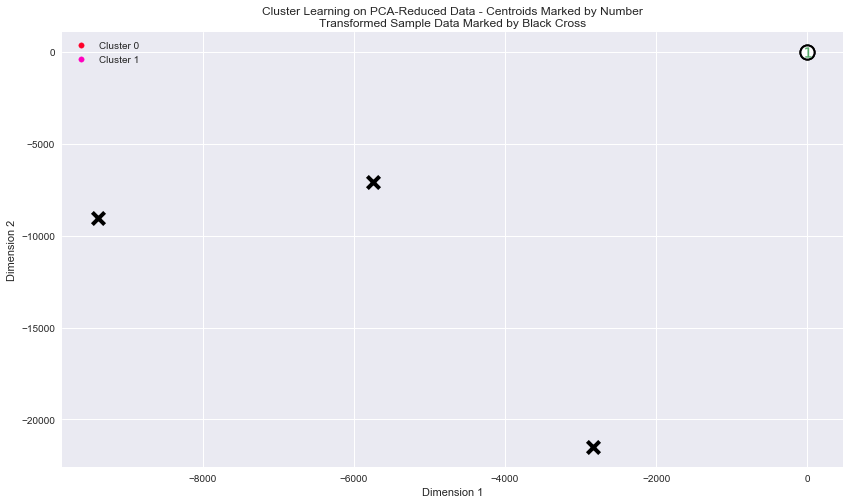

In [102]:

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [103]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3567.0,7804.0,12513.0,897.0,4592.0,973.0
Segment 1,9003.0,1912.0,2379.0,2084.0,295.0,686.0


In [104]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


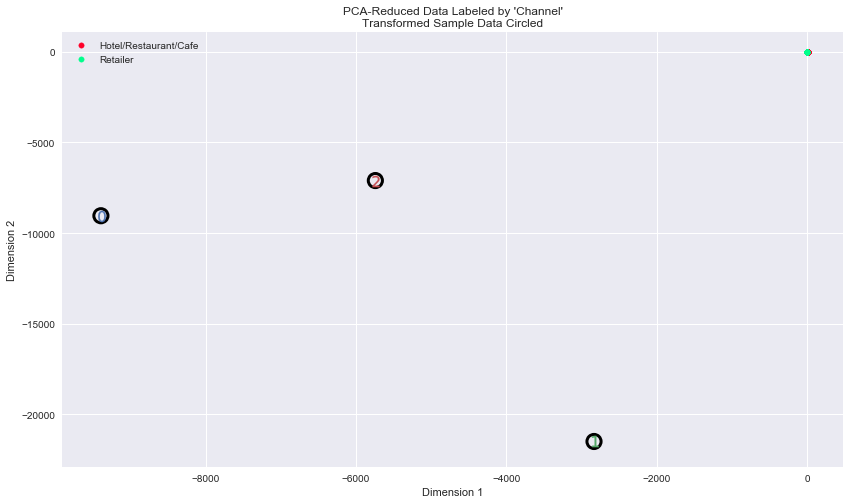

In [105]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)